In [20]:
%%capture --no-display
!pip install moviepy
!pip install --upgrade tvb-library
!pip install --upgrade tvb-data

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tvb_model_reference.src.nuu_tools_simulation_human as tools

from tvb_model_reference.simulation_file.parameter.parameter_M_Berlin import Parameter
from tvb_model_reference.view.plot_human import multiview_one, prepare_surface_regions_human
from analyses import *

parameters = Parameter()

# Loading results

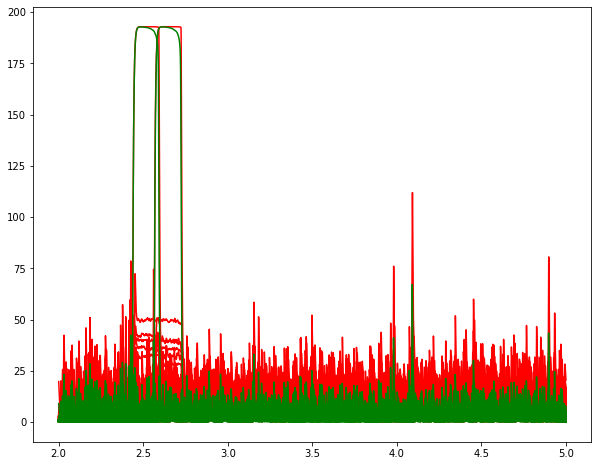

In [22]:
# Select a folder_root

folder_root = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results/' # Hard disk in ubuntu
# Define the parameters that we will use
cut_transient = 2000.0
run_sim = 5000.0

S = 0.5
b_e = 120.0
E_L_e = -60.0
E_L_i = -80.0
T = 5.0

fig, ax = plt.subplots(1, 1, figsize=(10, 8))

label_sim = '_a_' + str(S) + '_b_' + str(b_e) + '_ELI_' + str(E_L_i) + \
            '_ELE_' + str(E_L_e) + '_T_' + str(T) + '/'

file_name = folder_root + label_sim

# Draw plots of the firing rates
result = tools.get_result(file_name,cut_transient,run_sim)
time_s = result[0][0]*1e-3 #from ms to sec
FR_exc = result[0][1][:,0,:]*1e3 # from KHz to Hz; Excitatory firing rate
FR_inh = result[0][1][:,1,:]*1e3 # from KHz to Hz; Inhibitory firing rate
time_s = np.array(time_s, dtype=float)
del result

ax.plot(time_s, FR_inh, label=r'$v_i$', c='r')
ax.plot(time_s, FR_exc, label=r'$v_e$', c='g')

plt.show()

# Understanding the parcellation and the names of the regions in the model. MAIN OBJECTIVE: FINDING NODES INVOLVED IN DMN

In [5]:
# Prepare the elements that we will need to find the interesting nodes
cortex, conn, hem_left, hem_right = prepare_surface_regions_human(parameters, 
                                                                  conn_filename='Connectivity.zip',
                                                                  zip_filename='Surface_Cortex.zip',
                                                                  region_map_filename='RegionMapping.txt')
the_data = np.zeros((cortex.region_mapping_data.array_data.shape[0],))

In [57]:
# Highlight each of the regions in the brain
# for id_region in range(len(conn.region_labels)):
#     multiview_one(cortex, hem_left, hem_right, 
#                   [id_region], the_data, plt.figure(), suptitle='', 
#                   title=conn.region_labels[id_region], figsize=(8, 8), shaded=False)
#     plt.show()
#     plt.close()

In [7]:
# List of the regions in our model
print(conn.region_labels)

['bankssts_L' 'bankssts_R' 'caudalanteriorcingulate_L'
 'caudalanteriorcingulate_R' 'caudalmiddlefrontal_L'
 'caudalmiddlefrontal_R' 'cuneus_L' 'cuneus_R' 'entorhinal_L'
 'entorhinal_R' 'frontalpole_L' 'frontalpole_R' 'fusiform_L' 'fusiform_R'
 'inferiorparietal_L' 'inferiorparietal_R' 'inferiortemporal_L'
 'inferiortemporal_R' 'insula_L' 'insula_R' 'isthmuscingulate_L'
 'isthmuscingulate_R' 'lateraloccipital_L' 'lateraloccipital_R'
 'lateralorbitofrontal_L' 'lateralorbitofrontal_R' 'lingual_L' 'lingual_R'
 'medialorbitofrontal_L' 'medialorbitofrontal_R' 'middletemporal_L'
 'middletemporal_R' 'paracentral_L' 'paracentral_R' 'parahippocampal_L'
 'parahippocampal_R' 'parsopercularis_L' 'parsopercularis_R'
 'parsorbitalis_L' 'parsorbitalis_R' 'parstriangularis_L'
 'parstriangularis_R' 'pericalcarine_L' 'pericalcarine_R' 'postcentral_L'
 'postcentral_R' 'posteriorcingulate_L' 'posteriorcingulate_R'
 'precentral_L' 'precentral_R' 'precuneus_L' 'precuneus_R'
 'rostralanteriorcingulate_L' 'ro

# List of regions that are involved in DMN in litterature

Main functional hubs of the DMN:
1. medial prefrontal cortex
2. posterior cingulate cortex / precuneus
3. angular gyrus

## 1. Finding indexes of Posterior cingulate / Precuneus
We have both the posterior cingulate cortex and the precuneus in our lists

In [8]:
for i, label in enumerate(conn.region_labels):
    if 'posteriorcingulate' in label or 'precuneus' in label:
        print(f'region {label} has index {i}')

region posteriorcingulate_L has index 46
region posteriorcingulate_R has index 47
region precuneus_L has index 50
region precuneus_R has index 51


The default mode network is most commonly defined with resting state data by putting a seed in the Posterior cingulate cortex and examining which other brain areas most correlate with this area.


Independent component analysis (ICA) robustly finds the DMN for individuals and across groups, and has become the standard tool for mapping the default network.


It has been shown that the default mode network exhibits the highest overlap in its structural and functional connectivity, which suggests that the structural architecture of the brain may be built in such a way that this particular network is activated by default. Very interesting! Indicates that we should be able to get closer to it having the connectome!
(all from Wikipedia but it's cited and looks okay)

## 2. Looking for indexes of angular gyrus in our model

Inferioparietal i think are the closest ones to the angular gyrus. Additionally, the supramarginal gyrus is also really close

In [9]:
for i, label in enumerate(conn.region_labels):
    if 'inferio' in label or 'supramarginal' in label or 'isthmus' in label:
        print(f'region {label} has index {i}')

region inferiorparietal_L has index 14
region inferiorparietal_R has index 15
region inferiortemporal_L has index 16
region inferiortemporal_R has index 17
region isthmuscingulate_L has index 20
region isthmuscingulate_R has index 21
region supramarginal_L has index 62
region supramarginal_R has index 63


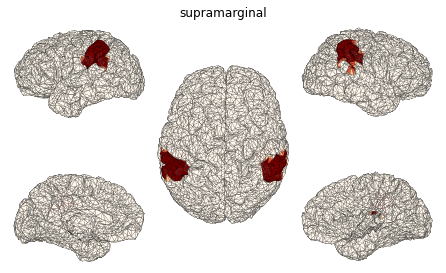

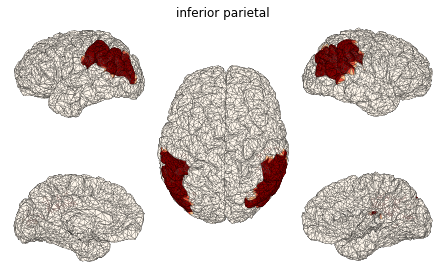

In [10]:
id_regions = [62, 63]
title = 'supramarginal'
multiview_one(cortex, hem_left, hem_right, 
              [62, 63], the_data, plt.figure(), suptitle='', 
              title=title, figsize=(8, 8), shaded=False)

id_regions = [14, 15, 62, 63]
title = 'inferior parietal'
multiview_one(cortex, hem_left, hem_right, 
              id_regions, the_data, plt.figure(), suptitle='', 
              title=title, figsize=(20, 20), shaded=False)

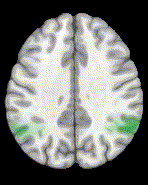
https://upload.wikimedia.org/wikipedia/commons/c/c4/Angular_gyrus_sagittal_sections.gif
https://upload.wikimedia.org/wikipedia/commons/a/a3/Angular_gyrus_transversal_sections.gif
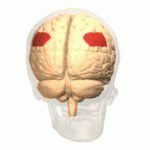

### Conclusion on looking for the angular gyrus
We can see that the angular gyrus is not isolated in our brain parcellation. Therefore, any region that we try to use as angular gyrus will also have influences (in dynamics and connectivity) from other regions near the angular gyurs. For these reasons, the angular gyrus will be ignored from now on.

It can be re-discussed later on.

## 3. Looking for indexes of the medial prefrontal cortex

What does the medial prefrontal cortex contain?

<div>
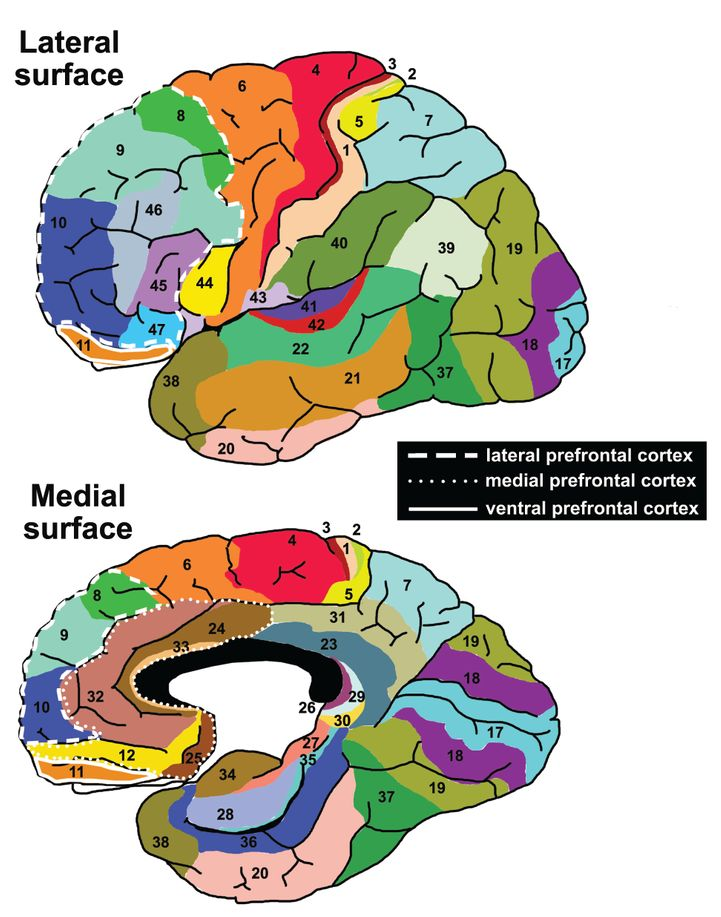
</div>

From this picture we consider that the Brodmann areas in the medial prefrontal cortex are:
- 24: Dorsal anterior cingulate cortex.
- 33: Rostral anterior cingulate cortex **There is one region with this name!**
- 32: Pregenual anterior cingulate cortex
- 12: No clear name. Possibly Orbitofrontal Area (orbital gyri, gyrus rectus, rostral gyrus and part of superior frontal gyrus) – receives information about the sight of objects as well as the reward value of taste. **We have medial oribitofrontal which actually takes a big chunk of space**
- 25: Subgenual anterior cingulate cortex

Let's plot them

In [12]:
for i, label in enumerate(conn.region_labels):
    if 'anteriorcingulate' in label or 'medialorbitofrontal' in label:
        print(f'region {label} has index {i}')

region caudalanteriorcingulate_L has index 2
region caudalanteriorcingulate_R has index 3
region medialorbitofrontal_L has index 28
region medialorbitofrontal_R has index 29
region rostralanteriorcingulate_L has index 52
region rostralanteriorcingulate_R has index 53


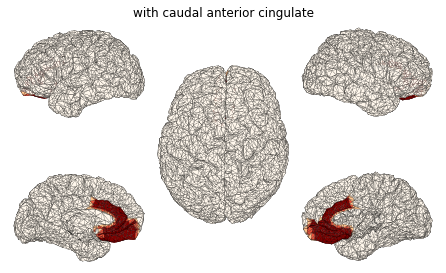

In [34]:
title = 'with caudal anterior cingulate'
multiview_one(cortex, hem_left, hem_right, 
              [2, 3, 28, 29, 52, 53], the_data, plt.figure(), suptitle='', 
              title=title, figsize=(5, 5), shaded=False)

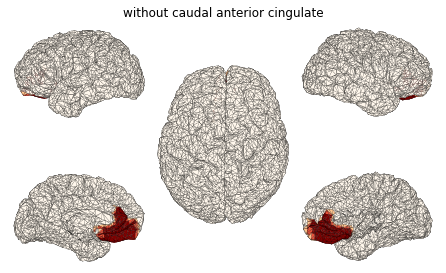

In [35]:
title = 'without caudal anterior cingulate'
multiview_one(cortex, hem_left, hem_right, 
              [28, 29, 52, 53], the_data, plt.figure(), suptitle='', 
              title=title, figsize=(5, 5), shaded=False)

# DMN nodes that we will use for the analyses

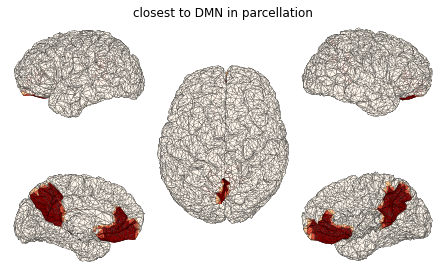

In [38]:
DMN_regions = [28, 29, 52, 53,  # mPFC
          50, 51, 20, 21]   # precuneus and posterior cingulate (seems large)

title = 'closest to DMN in parcellation'  # We are clearly missing the angular gyri
multiview_one(cortex, hem_left, hem_right, 
              DMN_regions, the_data, plt.figure(), suptitle='', 
              title=title, figsize=(8, 8), shaded=False)

# Obtaining the pearson correlation coefficient between nodes taking into account the DMN

In [49]:
def plot_corr_dmn(fr, dmn_regions=None, type_plot='box', jitter=True, plot=True):
    """ Shows box or violin plot of the statistics of correlation between nodes in the TVB.
    Separates in three groups:
    - Correlations between nodes of the Default Mode Network (DMN)
    - Correlations between nodes of the DMN and other nodes
    - Correlations between nodes not of the DMN

    The last one being, usually, the largest group of the three.

    Parameters
    ----------
    fr: ndarray
        Numpy array of shape (N, M) containing the firing rates of M regions.

    dmn_regions: list
        Contains the indexes of the M regions that belong to the Default Mode Network.

    type_plot: str
        Either 'box' or 'violin'.

    jitter: bool
        Determines whether we want to plot all the data points.
    
    no_plot: bool
        Determines if we only want to extrac the data element instead of plotting.

    Returns
    -------
    fig: matplotlib.pyplot fig object
    ax: matplotlib.pyplot axes object
        Shows statistics of correlations between the different nodes in the network.
    """

    if dmn_regions is None:
        dmn_regions = [28, 29, 52, 53,  # mPFC
                       50, 51, 20, 21]  # precuneus / posterior cingulate
    corrs_in_DMN = []
    corrs_out_DMN = []
    corrs_in_out_DMN = []

    # We make use of the FR_exc obtained
    N, M = fr.shape
    FC = np.corrcoef(fr.T)

    for i in range(M):
        for j in range(i): # If we want to take only one triangular portion of the matrix.
        #for j in range(M):
            if i == j:  # Not interested in diagonal
                continue
            corr = FC[i, j]
            if i in dmn_regions and j in dmn_regions:
                corrs_in_DMN.append(corr)
            elif any(n in dmn_regions for n in (i, j)):
                corrs_in_out_DMN.append(corr)
            else:
                corrs_out_DMN.append(corr)

    # Saving results in a dataframe
    df_in_DMN = pd.DataFrame({'group': np.repeat('DMN', len(corrs_in_DMN)),
                              'corr': corrs_in_DMN})

    df_in_out_DMN = pd.DataFrame({'group': np.repeat('DMN with others', len(corrs_in_out_DMN)),
                                  'corr': corrs_in_out_DMN})

    df_out_DMN = pd.DataFrame({'group': np.repeat('others', len(corrs_out_DMN)),
                               'corr': corrs_out_DMN})

    data = pd.concat([df_in_DMN, df_in_out_DMN, df_out_DMN])

    # Plotting
    if plot:
        fig, ax = plt.subplots(1, 1, figsize=(8, 5))
        ax.set(ylim=(-1, 1))
        if type_plot == 'box':
            sns.boxplot(x='group', y='corr', data=data, ax=ax)

        elif type_plot == 'violin':
            sns.violinplot(x='group', y='corr', data=data, ax=ax)
        else:
            raise ValueError('Incorrect choice of type_plot (either box or violin)')

        if jitter:
            sns.stripplot(x='group', y='corr', data=data, color="orange", jitter=0.2, size=2, ax=ax)
        
        return fig, ax, data
    else:
        return data

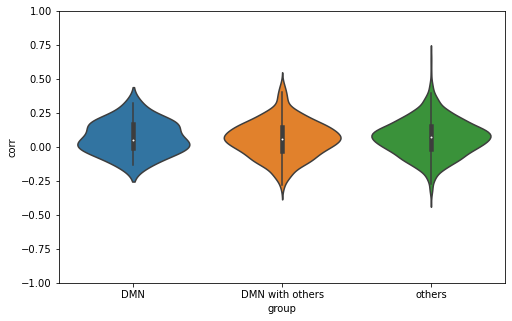

In [50]:
fig, ax, _ = plot_corr_dmn(FR_exc, type_plot='violin', jitter=False)
plt.show()

# Let's obtain the plots for the original set of parameters and b=0 and b=60

We want to try to see the differences through multiple trials. For that, we have simulated, both for b=0 and b=60 pA, 20 different runs of the simulation, slightly changing the initial conditions. One has to be careful and make sure that the changing of the IC does not push the model towards the broken point. Additionally, it is always interesting to check that the different runs are indeed different. It has happened to me multiple times that changing little details result in equal simulations.

In [51]:
# Simulate all the trials
parameters = Parameter()
bs = [0, 60]
folder_root = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results_test_DMN/'
sim = False

if sim:
    for simnum in range(len(bs)):
        parameters.parameter_model['b_e'] = bs[simnum]

        label_sim = '_b_e' + str(bs[simnum]) + '/'

        file_name = folder_root + label_sim
        parameters.parameter_simulation['path_result'] = file_name

        # Set up simulator with new parameters
        simulator = tools.init(parameters.parameter_simulation, parameters.parameter_model,
                               parameters.parameter_connection_between_region,
                               parameters.parameter_coupling,
                               parameters.parameter_integrator,
                               parameters.parameter_monitor)

        # Run simulations
        tools.run_simulation(simulator, run_sim, parameters.parameter_simulation, parameters.parameter_monitor)

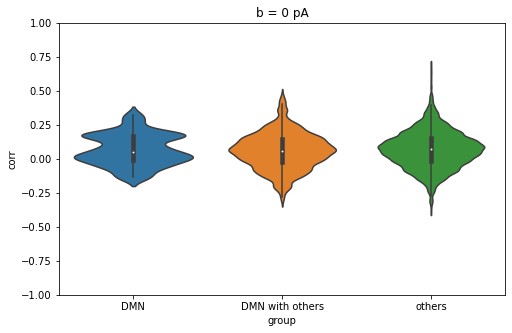

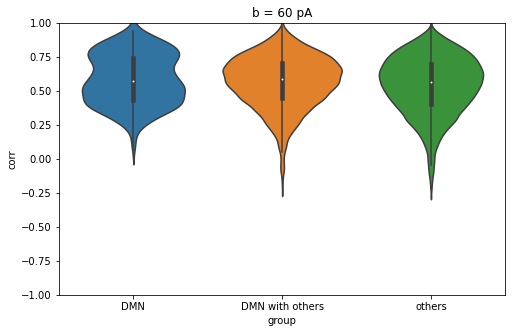

In [52]:
# Obtain the correlations. It is also possible to plot all the time-traces to make sure they are different
steps = 20
seeds = np.arange(20, 20 + steps)

# Plotting options
check_diffs = False  # To check if each simulation is different from the next one
type_plot = 'violin'
jitter = False
for b in bs:
    datas = []
    for seed in seeds:
        label_sim = '_b_' + str(b) + '_s_' + str(seed) + '/'
        file_name = folder_root + label_sim
        result = tools.get_result(file_name, cut_transient, run_sim)
        time_s = result[0][0] * 1e-3  # from ms to sec

        # Decide which one to analyze since they usually exhibit very similar behavior
        FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
        FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate
        seed_data = plot_corr_dmn(FR_exc, plot=False)
        datas.append(seed_data)
        if check_diffs:
            if seed > 20:
                print(np.sum(np.abs(FR_exc - FR_old)))
            FR_old = FR_exc
            fig, ax = plt.subplots(1, 1, figsize=(10, 8))
            ax.plot(time_s, FR_inh, label=r'$v_i$', c='r')
            ax.plot(time_s, FR_exc, label=r'$v_e$', c='g')
            #ax.set(title=f'S: {S}', xlabel='Time(s)', ylabel='FR(Hz)',
            #      xlim=(2, 5), ylim=(0, 5 + max([np.amax(FR_exc), np.amax(FR_inh)])))
            plt.show()
        
    data = pd.concat(datas)
    
    # Plot the aggregated data over the 20 different seeds.
    fig, ax = plt.subplots(1, 1, figsize=(8, 5))
    ax.set(ylim=(-1, 1))
    
    if type_plot == 'box':
        sns.boxplot(x='group', y='corr', data=data, ax=ax)

    elif type_plot == 'violin':
        sns.violinplot(x='group', y='corr', data=data, ax=ax)

    if jitter:
        sns.stripplot(x='group', y='corr', data=data, color="orange", jitter=0.2, size=2, ax=ax)
        
    ax.set_title(f'b = {b} pA')
    plt.show()

# Trying to find regularities in activation

Main Idea: Trying to find average differences or average elements that appear in all the seeds. Trying to get close to fMRI methods to see which regions (voxels) are correlated between them. Then plot those regions with highest interest in the map and see if they look like the DMN.

For instance, we try to see the difference in activation, in each region, between the b=0pA state and the b=60pA state. To do this, we take the mean in time of each region both @ b=0 and b=60pA and subtract them. That way we have the change in mean activity per region.

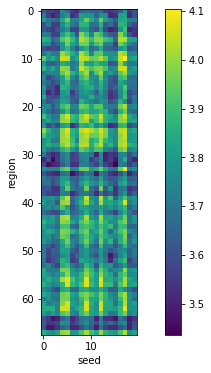

In [53]:
avgs = np.empty((68, seeds.size))
for ii, seed in enumerate(seeds):
    datas = []
    FRs = []
    for b in bs:
        label_sim = '_b_' + str(b) + '_s_' + str(seed) + '/'
        file_name = folder_root + label_sim
        result = tools.get_result(file_name, cut_transient, run_sim)
        time_s = result[0][0] * 1e-3  # from ms to sec

        # Decide which one to analyze since they usually exhibit very similar behavior
        FR_exc = result[0][1][:, 0, :] * 1e3  # from KHz to Hz; Excitatory firing rate
        FR_inh = result[0][1][:, 1, :] * 1e3  # from KHz to Hz; Inhibitory firing rate
        FRs.append(FR_exc)
    
    avgs[:, ii] = np.mean(FRs[0], axis=0) - np.mean(FRs[1], axis=0)


fig, ax = plt.subplots(1, 1, figsize=(10, 6))
im = ax.imshow(avgs)
ax.set(xlabel='seed', ylabel='region')
plt.colorbar(im)
plt.show()

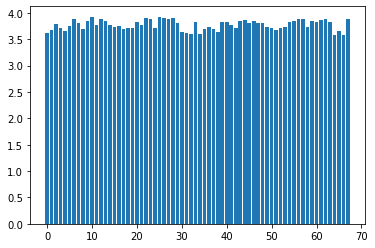

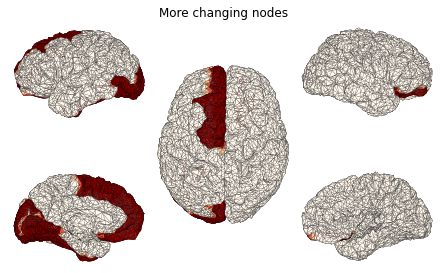

In [56]:
# Select the k most changing regions and plotting them
mean_regions = np.mean(avgs, axis=1)
plt.bar(np.arange(0, 68), mean_regions)
np.argmin(mean_regions)
k = 8

idx = np.argpartition(mean_regions, -k)[-k:]
cortex, conn, hem_left, hem_right = prepare_surface_regions_human(parameters, 
                                                                  conn_filename='Connectivity.zip',
                                                                  zip_filename='Surface_Cortex.zip',
                                                                  region_map_filename='RegionMapping.txt')
the_data = np.zeros((cortex.region_mapping_data.array_data.shape[0],))

title = 'More changing nodes'
multiview_one(cortex, hem_left, hem_right, 
              idx.tolist(), the_data, plt.figure(), suptitle='', 
              title=title, figsize=(8, 8), shaded=False)

It is interesting that we kind of recover the left part of the DMN for this case. However, litterature seems to indicate that the correlations in the DMN do not change a lot when going from restful wake to deep sleep. There is one paper where the rostral part of the DMN seems to disconnect from the posterior part. Later papers mention that in said study participants were significantly sleep deprived which might affect the workings of the prefrontal cortex.

All in all, this method does not seem to be the best one to provide predictions from the model. Might be interesting to apply the same approach when applying stimuli, trying to simulate heavy cognitive activities, where other networks take more importance than the DMN.

# Seeding approach

How do we do the seeding approach? We take the the precuneus as the seed region and obtain the correlations of all the other regions with this seed. We can do both left and right and see the brain maps. Then we apply Fisher's transofmration to obtain z-scores and afterwards we plot the maps.

In [ ]:
# Let's obtain the FR of one possible situation
folder_root = '/media/master/Nuevo vol/Internship/Data/hpc_tvbadex/results/' # Hard disk in ubuntu
cut_transient = 2000.0
run_sim = 5000.0
S = 0.5
b_e = 120.0
E_L_e = -60.0
E_L_i = -60.0
T = 40.0

label_sim = '_a_' + str(S) + '_b_' + str(b_e) + '_ELI_' + str(E_L_i) + \
            '_ELE_' + str(E_L_e) + '_T_' + str(T) + '/'

file_name = folder_root + label_sim

result = tools.get_result(file_name,cut_transient,run_sim)
time_s = result[0][0]*1e-3 #from ms to sec
FR_exc = result[0][1][:,0,:]*1e3 # from KHz to Hz; Excitatory firing rate
FR_inh = result[0][1][:,1,:]*1e3 # from KHz to Hz; Inhibitory firing rate
del result

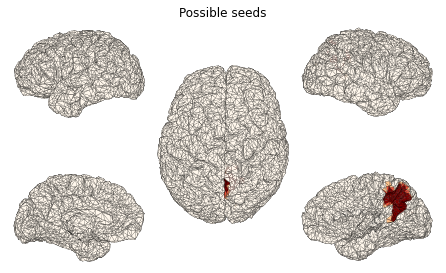

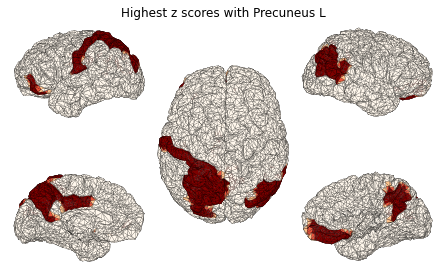

In [33]:
# Precuneus and cingulate regions
possible_seed = 51 #[50, 51, 20, 21]  # precuneus and posterior cingulate (seems large)
multiview_one(cortex, hem_left, hem_right, 
              possible_seed, the_data, plt.figure(), suptitle='', 
              title='Possible seeds', figsize=(8, 8), shaded=False)

# Let's choose first region 50 precuneus L

# We obtain the correlations with it
FC = np.corrcoef(FR_exc.T)
corrs_wrt_seed = FC[np.arange(68) != possible_seed, possible_seed]

idx_regions_without_seed = np.concatenate((np.arange(0, possible_seed), np.arange(possible_seed+1, 68)))
z_value_wrt_seed = np.arctanh(corrs_wrt_seed)

k = 8

idx = np.argpartition(z_value_wrt_seed, -k)[-k:]
title = 'Highest z scores with Precuneus L'
multiview_one(cortex, hem_left, hem_right, 
              idx.tolist(), the_data, plt.figure(), suptitle='', 
              title=title, figsize=(8, 8), shaded=False)

### Next step I would like to take
It would be cool to threshold and do the colormaps like they do on actual fMRI data. However, that will probably be quite complicated to modify from the original functions.

In theory it shouldn't be extremely hard. Only change the value of the colormap for each region depending on its z score. However, I don't know why these regions already have different colors. It might be due to the 3D characteristics of the plotting functions.